<a href="https://colab.research.google.com/github/plaban1981/churn-prediction/blob/master/Building_Predictive_Maintenance_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Predictive Maintenance techniques are designed to predict when maintenance should be performed on a piece of equipment even before it breaks down.  

- Preventive maintenance refers to scheduled maintenance that is typically planned in advance.

- Predictive maintenance aims to predict failures before they happen.

Current techniques for predictive maintenance include vibration analysis,acoustical analysis,infrared monitoring,oil analysis and model-based condition modeling.

## Predictive Maintenance Scenarios 

- Predicting if a given component will fail or not before it happens.This helps to proactively prioritize the activity pertaining to the component and there by reduces unplanned downtime and cost.

- Diagnosing the most likely cause of failure as a result of which the problems can be fixed faster

- Predicting when a component will fail. This will help for defining SLAs or warranties.


## Business Problem 
* Build a model taht predicts yield failure on their manufacturing process

* Through analysis determine the factors that lead to yield failures in their process.

## Data Acquisition and Preparation

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data',sep=' ',header=None)

In [0]:
df_label = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data',sep=' ',header=None,names=['Label','time'])

In [31]:
df_label.head()

,Label,time
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [38]:
df.shape

(1567, 590)

In [39]:
labels.shape

(1567,)

In [0]:
sample_data = pd.concat([df,df_label],axis=1)

In [44]:
sample_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Label,time
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00


In [0]:
df_train = sample_data.drop('time',axis=1)

In [46]:
df_train.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           581,     582,     583,     584,     585,     586,     587,     588,
           589, 'Label'],
      dtype='object', length=591)

In [49]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Label
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,...,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1566.000000,1566.000000,1566.000000,1566.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,618.000000,618.000000,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,0.000146,0.964353,199.956809,0.0,9.005371,413.086035,9.907603,0.971444,190.047354,12.481034,1.405054,-5618.393610,2699.378435,-3806.299734,-298.598136,1.203845,1.938477,6.638628,69.499532,2.366197,0.184159,3.673189,85.337469,8.960279,50.582639,64.555787,49.417370,66.221274,86.836577,118.679554,...,1.230712,0.276688,7.703874,0.503657,57.746537,4.216905,1.623070,0.995009,0.325708,0.072443,32.284956,262.729683,0.679641,6.444985,0.145610,2.610870,0.060086,2.452417,21.117674,530.523623,2.101836,28.450165,0.345636,9.162315,0.104729,5.563747,16.642363,0.021615,0.016829,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,0.009302,0.012452,3.257276,0.0,2.796596,17.221095,2.403867,0.012062,2.781041,0.217965,0.016737,626.822178,295.498535,1380.162148,2902.690117,0.177600,0.189495,1.244249,3.461181,0.408694,0.032944,0.535322,2.026549,1.344456,1.182618,2.574749,1.182619,0.304141,0.446756,1.807221,...,1.361117,0.276231,2.192647,0.598852,35.207552,1.280008,1.870433,0.083860,0.201392,0.051578,19.026081,7.630585,0.121758,2.633583,0.081122,1.032761,0.032761,0.996644,10.213294,17.499736,0.275112,86.304681,0.248478,26.920150,0.067791,16.921369,12.485267,0.011730,0.009640,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,-0.034900,0.655400,182.094000,0.0,2.249300,333.448600,4.469600,0.579400,169.177400,9.877300,1.179700,-7150.250000,0.000000,-9986.750000,-14804.500000,0.000000,0.000000,0.000000,59.400000,0.666700,0.034100,2.069800,83.182900,7.603200,49.834800,63.677400,40.228900,64.919300,84.732700,111.712800,...,0.120000,0.018700,2.786000,0.052000,4.826900,1.496700,0.164600,0.891900,0.069900,0.017700,7.236900,242.286000,0.304900,0.970000,0.022400,0.412200,0.009100,0.370600,3.250400,317.196400,0.980200,3.540000,0.066700,1.039500,0.023000,0.663600,4.582000,-0.016900,0.003200,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,-0.005600,0.958100,198.130700,0.0,7.094875,406.127400,9.567625,0.968200,188.299825,12.460000,1.396500,-5933.250000,2578.000000,-4371.750000,-1476.000000,1.094800,1.906500,5.263700,67.377800,2.088900,0.161700,3.362700,84.490500,8.580000,50.252350,64.024800,49.421200,66.040650,86.578300,118.015600,...,0.870000,0.094900,6.738100,0.343800,27.017600,3.625100,1.182900,0.95520

## Clean Missin Values

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, 0 to Label
dtypes: float64(590), int64(1)
memory usage: 7.1 MB


#### Replacing missing values with mode of respective features

In [0]:
for column in df_train.columns:
  if column != 'Label':
    df_train[column].fillna(df_train[column].mode()[0], inplace=True)


In [67]:
df_train.shape

(1567, 591)

#### Checking if null values have been handled.

In [72]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Series([], dtype: int64)

## Feature Selection

#### Using Pearsons Correlation
The correlation coefficient has values between -1 to 1

* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,mutual_info_classif

In [0]:
X = df_train.drop('Label',axis=1)
Y = df_train['Label']

## Score 

Estimate mutual information for a discrete target variable.

Mutual information (MI) [1]_ between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [0]:
kbest = SelectKBest(mutual_info_classif,k=30)
X_new = kbest.fit_transform(X,Y)

In [87]:
X_new.shape

(1567, 30)

In [85]:
X_new[0:]

array([[12.519 ,  9.5126, 61.29  , ...,  0.3157,  3.0624, 14.9509],
       [12.4608,  9.7997, 78.25  , ...,  0.2653,  2.0111, 10.9003],
       [12.5404,  8.659 , 14.37  , ...,  0.1882,  4.0923,  9.2721],
       ...,
       [12.4555,  8.1728, 82.03  , ...,  0.4154,  2.176 , 17.7267],
       [12.3937,  9.193 , 81.13  , ...,  0.3669,  3.2524, 19.2104],
       [12.479 ,  8.7786, 80.45  , ...,  0.4774,  2.2727, 22.9183]])

In [0]:
selected_features = []
for i in range(len(kbest.get_support().tolist())):
  if kbest.get_support()[i] == True:
    selected_features.append(i)

#### The best features selected by feature selection method - SelectKbest

In [94]:
selected_features,len(selected_features)

([33,
  41,
  56,
  65,
  84,
  127,
  128,
  273,
  274,
  275,
  288,
  305,
  331,
  405,
  406,
  407,
  411,
  412,
  416,
  443,
  477,
  510,
  539,
  541,
  570,
  571,
  573,
  574,
  575,
  577],
 30)

## Training the Model

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#
X_train,X_test,y_train,y_test = train_test_split(X_new,Y.values,test_size=0.15,random_state=1)
#
rf = RandomForestClassifier(n_estimators=100,random_state=1)

## Train the Model

In [96]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

## Predictining the Label

In [0]:
y_pred = rf.predict(X_test)

## Evaluate Model Performance

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [99]:
print(f'Accuracy of the Model trained  : {accuracy_score(y_test,y_pred)}')

Accuracy of the Model trained  : 0.9322033898305084


## Visualizing Type1 and Type2 errors using confusion matrix

In [110]:
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm,columns=['pass','fail'],index=['pass','fail'])
df_cm

,pass,fail
pass,220,0
fail,16,0


Text(0.5, 15.0, 'Predicted Label')

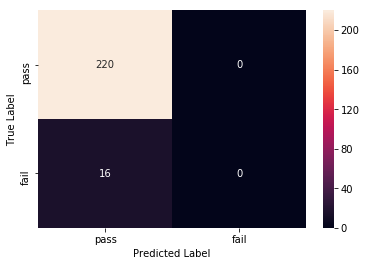

In [113]:
sns.heatmap(df_cm,annot=True,fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

#### The confusion matrix has the following four cells:

- **True Negative:** In the historical dataset the yield actually passed and the model also correctely predicts a pass.

- **True Positive:** In the historical dataset the yiled failed and the models correctly predicts failure 

- **False Negative:** The model incorrectly predicts the yield to be a fail when the yield infact is a pass.

- **False Positive:** The model incorectly predicts the yield to be a pass when in reality it failed.


## ROC curve

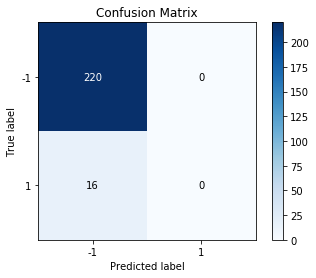

In [109]:
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

## Prediction Probabiliies

In [0]:
y_pred_proba = rf.predict_proba(X_test)

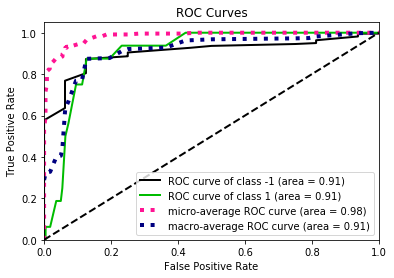

In [108]:
import scikitplot
scikitplot.metrics.plot_roc(y_test,y_pred_proba)